# Training a Decision Tree Classifier on Fisher's Iris Flower Dataset

The decision tree model of classification is an intuitive supervised learning algorithm that uses a tree like structure and minimization of some chosen impurity measure to gradually split training data across some impurity threshold until the impurity is minimized. Two of the impurity measures featured in Sci-Kit-Learn's implemenetion of the decision tree classifier are the entropy and gini impurity measures. Entropy in this context describes the variability of the contents at a particular node, based on class label. For example, a node containing all samples belonging to the same class would have zero entropy and therefore, an optimized prediction would be available. The Gini impurity, in general terms, describe the probability of incorrect classification if a sample chosen at random from a node were to be classified as class i. As before, this yields zero when all samples at a node belong to the same class. The equations describing these measures are shown below: 

$$I_{entropy} \left \{ p_{i} \right \} = - \sum_{i=1}^{m} p_{i}log_{2}p_{i}$$

$$I_{Gini} \left \{ p_{i} \right \} = \sum_{i!=j} p_{i}p_{j}$$

Below is a short demonstration and analysis of the decision tree model on the Iris flower dataset. The model is trained on the data using sklearn's implementation with varying tree depths and for both available impurity measures. 

In [31]:
#import libraries, data, and create train-test split

from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets
from prettytable import PrettyTable

iris = datasets.load_iris()

X = iris.data[:, [0,1,2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify =y)

training_errors = []
test_errors = []


## Train using the default Gini impurity criterion 

In [32]:
maxDepth = 10

for i in range(0, maxDepth):
    tree = DecisionTreeClassifier(criterion = 'gini', max_depth = i+1, random_state=1)
    tree.fit(X_train, y_train)
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    training_errors.append(1-tree.score(X_train, y_train))
    test_errors.append(1-tree.score(X_test, y_test))
    

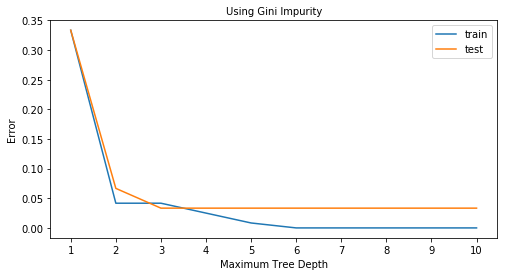

In [33]:
# plot errors by tree depth    

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Using Gini Impurity', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,maxDepth+1),training_errors[:10], label='train')
ax.plot(np.arange(1,maxDepth+1),test_errors[:10], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


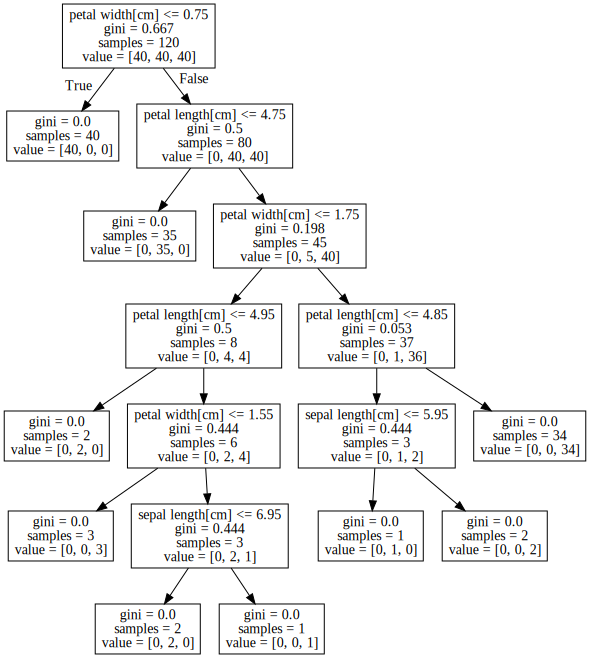

In [34]:
# plot the final decision tree
export_graphviz(tree, out_file='T_Gini.dot', feature_names=['sepal length[cm]','sepal width[cm]', 
                                                            'petal length[cm]', 'petal width[cm]'])
with open('T_Gini.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Train using entropy as a criterion 

In [35]:
maxDepth = 10

for i in range(0, maxDepth):
    tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i+1, random_state=1)
    tree.fit(X_train, y_train)
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    training_errors.append(1-tree.score(X_train, y_train))
    test_errors.append(1-tree.score(X_test, y_test))
  

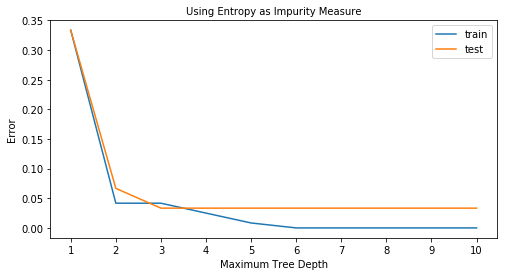

In [36]:
# plot errors by tree depth    

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Using Entropy as Impurity Measure', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,maxDepth+1),training_errors[10:], label='train')
ax.plot(np.arange(1,maxDepth+1),test_errors[10:], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


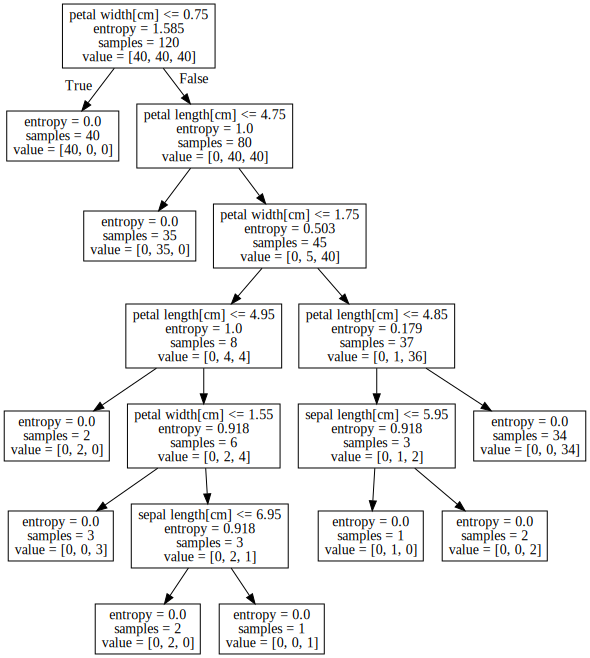

In [37]:
# plot the final decision tree
export_graphviz(tree, out_file='T_Entropy.dot', feature_names=['sepal length[cm]','sepal width[cm]', 
                                                            'petal length[cm]', 'petal width[cm]'])
with open('T_Entropy.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [38]:
#print results
model = np.arange(1,21)
depth = list(np.arange(1, 11))*2
criterion1 = np.full((10), 'Gini') 
criterion2 = np.full((10), 'Entropy')
criterion = np.hstack((criterion1, criterion2))

results = [] 
results.append(model)
results.append(depth)
results.append(criterion)
results.append(training_errors)
results.append(test_errors)

results

header = ['Model #', 'Depth', 'Criterion', 'Error(Training)', 'Error(Test)']
table = PrettyTable()
for col, result in enumerate(results):
       table.add_column(header[col], result)
print(table)

+---------+-------+-----------+----------------------+----------------------+
| Model # | Depth | Criterion |   Error(Training)    |     Error(Test)      |
+---------+-------+-----------+----------------------+----------------------+
|    1    |   1   |    Gini   | 0.33333333333333337  | 0.33333333333333337  |
|    2    |   2   |    Gini   | 0.04166666666666663  | 0.06666666666666665  |
|    3    |   3   |    Gini   | 0.04166666666666663  | 0.033333333333333326 |
|    4    |   4   |    Gini   | 0.025000000000000022 | 0.033333333333333326 |
|    5    |   5   |    Gini   | 0.008333333333333304 | 0.033333333333333326 |
|    6    |   6   |    Gini   |         0.0          | 0.033333333333333326 |
|    7    |   7   |    Gini   |         0.0          | 0.033333333333333326 |
|    8    |   8   |    Gini   |         0.0          | 0.033333333333333326 |
|    9    |   9   |    Gini   |         0.0          | 0.033333333333333326 |
|    10   |   10  |    Gini   |         0.0          | 0.0333333

## Discussion

For this particular example, it seems that choice of impurity may be inconsequential. This could be because of the small size of the dataset, or it could be because the features of the dataset lend themselves well to rapid convergence. This seems to be the case, as the above table shows both models performing almost identically and both training data errors converge to 0 after traversing just five levels of the decision tree. To further illustrate this point, the visualization of both decision trees shows that it takes only one level of the tree to completely isolate one class of flowers, and the same amount of splits to isolate the other two, showing choice of impurity to be somewhat trivial for this particular problem. 